# Machine Learning Assignment

**Dataset**:       AIRLINE SATISFACTION

**Student ID**:    s5516729

**Student Name**:  Oliver Whittle

## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [ ]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import DBSCAN

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

# Extras that I haven't organised yet
from sklearn.impute import KNNImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import plotly.express as px
from statistics import mean
from tensorflow import keras

In [ ]:
# This is required for installing the HyperParameter tuning for the Neural Network
!pip install -q -U keras-tuner
import keras_tuner as kt

## Loading the dataset

In [ ]:
import pandas as pd

#Create two copies of the data. One for EDA and one for the Machine Learning Model
df_eda = pd.read_csv('/content/data/airline-satisfaction.csv')
df = pd.read_csv('/content/data/airline-satisfaction.csv')


## Exploratory data analysis

Section for exploratory data analysis, to address **Tasks 1.1 and 1.2**.

**OBS:** You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle things like missing values and non-numeric data.

**Create more cells as needed!**

In [ ]:
# printing out dataset info
df_eda.info()

# printing out dataset details
df_eda.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14735 entries, 0 to 14734
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 14735 non-null  int64  
 1   gender                             14735 non-null  object 
 2   customer_type                      14735 non-null  object 
 3   age                                14735 non-null  int64  
 4   type_of_travel                     11367 non-null  object 
 5   travel_class                       9586 non-null   object 
 6   flight_distance                    14735 non-null  int64  
 7   inflight_wifi_service              9831 non-null   float64
 8   departure_arrival_time_convenient  14735 non-null  int64  
 9   ease_of_online_booking             14735 non-null  int64  
 10  gate_location                      14735 non-null  int64  
 11  food_and_drink                     14735 non-null  int

,id,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,14735.000000,14735.000000,14735.000000,9831.000000,14735.000000,14735.000000,14735.000000,14735.000000,9216.000000,14735.000000,9782.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,12465.000000,6553.000000
mean,65495.528130,39.481710,1217.195996,2.716407,3.038616,2.738785,2.965389,3.218052,3.244683,3.433729,3.376610,3.381133,3.349304,3.644316,3.297523,3.646149,3.288768,13.745287,14.488479
std,37714.136926,17.119703,1734.648062,1.320599,1.531069,1.396625,1.286668,1.331311,1.342944,1.318676,1.388112,1.292489,1.328217,1.170391,1.265642,1.166097,1.313448,37.345912,37.122408
min,15.000000,7.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32804.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,65783.000000,40.000000,851.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,98616.000000,51.000000,1768.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,11.000000,12.000000
max,129865.000000,999.000000,172888.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,44.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1017.000000,823.000000


In [ ]:
#Prints how many unique values there are per column
print(df_eda.nunique())
print("------------------------------------------------------------")
#Prints how many null values there are per column
print(df_eda.isnull().sum())
print("------------------------------------------------------------")
#Same as above but shows what percentage of cells are null per column
print(df_eda.isnull().sum()/(len(df_eda)) * 100)
print("------------------------------------------------------------")
#How many rows have atleast one null value
print("Number of rows with atleast one missing value: " + str(sum([True for idx,row in df_eda.iterrows() if any(row.isnull())])))

id                                   12988
gender                                   2
customer_type                            2
age                                     76
type_of_travel                           2
travel_class                             3
flight_distance                       2706
inflight_wifi_service                    6
departure_arrival_time_convenient        6
ease_of_online_booking                   6
gate_location                            5
food_and_drink                           6
online_boarding                          6
seat_comfort                             5
inflight_entertainment                   6
on_board_service                         6
leg_room_service                         6
baggage_handling                         5
checkin_service                          5
inflight_service                         6
cleanliness                              6
departure_delay_in_minutes             245
arrival_delay_in_minutes               205
class      

In [ ]:
#Check to see if there are any duplicated rows and if so which rows are they

duplicateRows = df_eda[df_eda.duplicated(keep='last')]

print("Number of duplicate rows: " + str(len(duplicateRows)))

Number of duplicate rows: 0


[Text(0.5, 0, 'class'), Text(0, 0.5, 'count')]

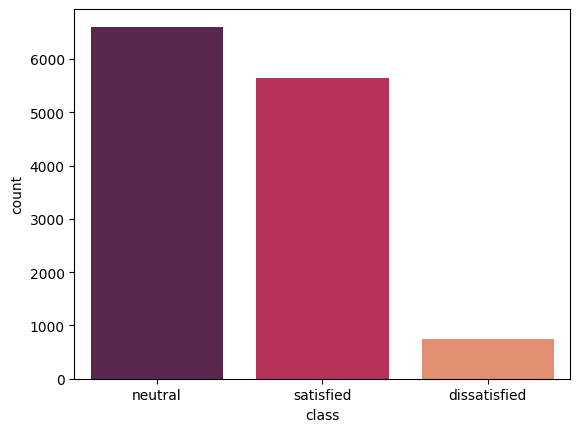

In [ ]:
#Check the class balance

data = df_eda['class'].value_counts().reset_index()

ax = sns.barplot(x = 'index', y = 'class', data = data, palette = 'rocket')

ax.set(xlabel='class', ylabel='count')

In [ ]:
disatisfied_passnegers = df_eda.loc[df_eda['class'] == 'dissatisfied']

print("Average age of dissatisfied passengers: " + str(disatisfied_passnegers['age'].mean()))
print("Average gender of dissatisfied passengers: " + str(disatisfied_passnegers['gender'].mode()[0]))

Average age of dissatisfied passengers: 37.77883310719132
Average gender of dissatisfied passengers: Female


In [ ]:
#Use DBSCAN for clustering analysis

#Data setup
#feature_1_vs_feature_2 = df[['age', 'flight_distance']]
#feature_1, feature_2 = df.age, df.flight_distance

#X = feature_1_vs_feature_2.to_numpy()

#dbscan=DBSCAN(eps=10, min_samples=5).fit(X)

#feature_1_vs_feature_2['clusters'] = dbscan.labels_

#fig = px.scatter(x=feature_2, y=feature_1, color=feature_1_vs_feature_2['clusters'])
#fig.show()

#epsilons = np.linspace(0.01, 1, num=15)
#epsilons

<ipython-input-19-38e894db4009>:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrolation_matrix = df_eda.corr()


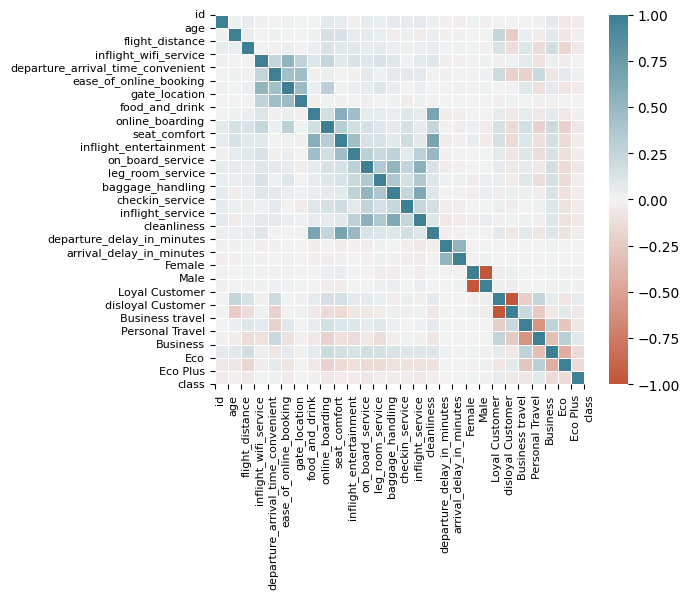

In [ ]:
#Extra Data Pre-Processing Required For This Section

#Seperate class column from rest of data set
df_eda_X = df_eda.iloc[:,:len(df_eda.columns)-1]
df_eda_y = df_eda.iloc[:,len(df_eda.columns)-1]

#One Hot Encoding
for col in df_eda_X.columns:
  data_type = df_eda_X[col].dtypes
  if data_type == object:
    df_temp = pd.get_dummies(df_eda_X[col])
    df_eda_X = pd.concat([df_eda_X, df_temp], axis=1).reindex(df_eda_X.index)
    df_eda_X.drop(col, axis=1, inplace=True)

#Uses KNN to asign a value to all null values
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df_eda_X)
df_imputed = pd.DataFrame(imputed, columns=df_eda_X.columns)

#Round all values so they dont have any decimal points
df_eda_X = df_imputed.round(decimals = 0)

#Make df whole again
df_eda = pd.concat([df_eda_X, df_eda_y], axis=1)

#===================================================================================================#

#Corrolation analysis using Correlation matrix

corrolation_matrix = df_eda.corr()

ax = sns.heatmap(
    corrolation_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidth=.5
)

ax.set_xticks(range(len(df_eda.columns)), labels=df_eda.columns)
ax.set_yticks(range(len(df_eda.columns)), labels=df_eda.columns)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='left',
    fontsize=8
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=8
);

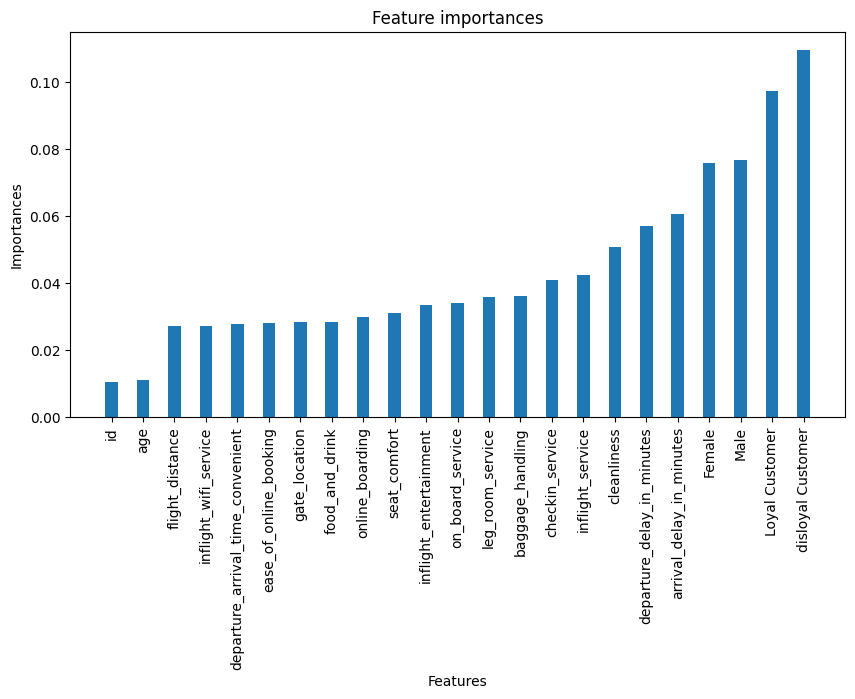

In [ ]:
#Extra Data Pre-Processing Required For This Section

#Seperate class column from rest of data set
df_eda_X = df_eda.iloc[:,:len(df_eda.columns)-1]
df_eda_y = df_eda.iloc[:,len(df_eda.columns)-1]

#One Hot Encoding
for col in df_eda_X.columns:
  data_type = df_eda_X[col].dtypes
  if data_type == object:
    df_temp = pd.get_dummies(df_eda_X[col])
    df_eda_X = pd.concat([df_eda_X, df_temp], axis=1).reindex(df_eda_X.index)
    df_eda_X.drop(col, axis=1, inplace=True)

#Uses KNN to asign a value to all null values
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df_eda_X)
df_imputed = pd.DataFrame(imputed, columns=df_eda_X.columns)

#Round all values so they dont have any decimal points
df_eda_X = df_imputed.round(decimals = 0)

#Make df whole again
df_eda = pd.concat([df_eda_X, df_eda_y], axis=1)

#===================================================================================================#

#Feature importance

X = df_eda.iloc[:,:len(df.columns)-1]
y = df_eda.iloc[:,len(df.columns)-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

rf = RandomForestClassifier()

rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize = (10, 5))
plt.bar(range(len(indices)), importances[indices], width = 0.4)
plt.xticks(range(len(indices)), X.iloc[indices])
plt.xticks(rotation=90)

plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature importances")
plt.show()


## Core data pre-processing
Do core data pre-processing here, which is not part of your machine learning experiments.

For example, this may be to convert non-numeric features into numeric ones.

In [ ]:
#Seperate class column from rest of data set
df_not_class = df.iloc[:,:len(df.columns)-1]
df_classes = df.iloc[:,len(df.columns)-1]

In [ ]:
#Remove of id column because it is of no relevance in analysing the data
df_not_class = df_not_class.drop(['id'], axis = 1)
df_not_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             12988 non-null  object 
 1   customer_type                      12988 non-null  object 
 2   age                                12988 non-null  int64  
 3   type_of_travel                     10016 non-null  object 
 4   travel_class                       8466 non-null   object 
 5   flight_distance                    12988 non-null  int64  
 6   inflight_wifi_service              8643 non-null   float64
 7   departure_arrival_time_convenient  12988 non-null  int64  
 8   ease_of_online_booking             12988 non-null  int64  
 9   gate_location                      12988 non-null  int64  
 10  food_and_drink                     12988 non-null  int64  
 11  online_boarding                    8105 non-null   flo

In [ ]:
#One Hot Encoding

for col in df_not_class.columns:
  data_type = df_not_class[col].dtypes
  if data_type == object:
    df_temp = pd.get_dummies(df_not_class[col])
    df_not_class = pd.concat([df_not_class, df_temp], axis=1).reindex(df_not_class.index)
    df_not_class.drop(col, axis=1, inplace=True)

df_not_class.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,arrival_delay_in_minutes,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
0,30,2586,2.0,2,2,4,2,4.0,4,NaN,...,NaN,1,0,0,1,1,0,0,0,0
1,66,315,NaN,4,3,1,5,NaN,5,NaN,...,26.0,1,0,1,0,0,1,0,1,0
2,39,510,NaN,5,5,1,4,5.0,4,4.0,...,NaN,1,0,0,1,1,0,1,0,0
3,21,767,4.0,0,4,3,4,4.0,4,NaN,...,NaN,1,0,0,1,1,0,1,0,0
4,53,486,NaN,1,1,1,5,4.0,4,NaN,...,0.0,1,0,1,0,1,0,0,0,0


In [ ]:
#Uses KNN to asign a value to all null values

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df_not_class)
df_imputed = pd.DataFrame(imputed, columns=df_not_class.columns)

#Round all values so they dont have any decimal points

df_not_class = df_imputed.round(decimals = 0)

df_not_class.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,arrival_delay_in_minutes,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
0,30.0,2586.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,4.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,66.0,315.0,4.0,4.0,3.0,1.0,5.0,3.0,5.0,4.0,...,26.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,39.0,510.0,3.0,5.0,5.0,1.0,4.0,5.0,4.0,4.0,...,4.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,21.0,767.0,4.0,0.0,4.0,3.0,4.0,4.0,4.0,3.0,...,13.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,53.0,486.0,4.0,1.0,1.0,1.0,5.0,4.0,4.0,4.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


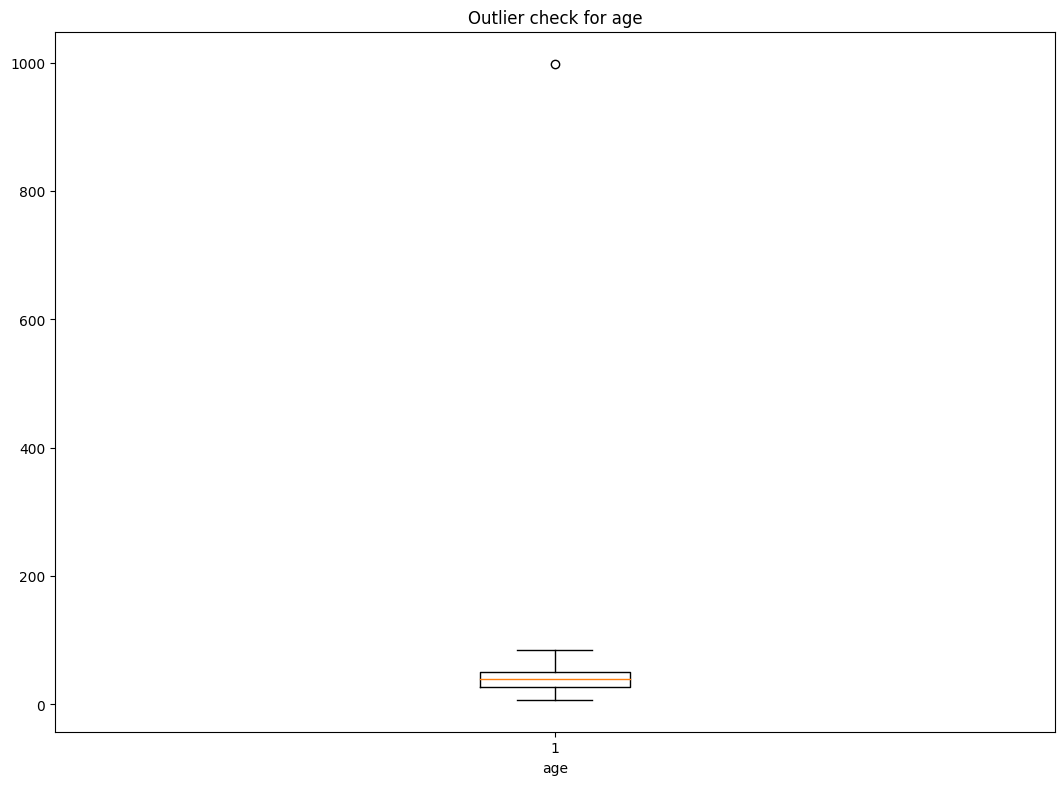

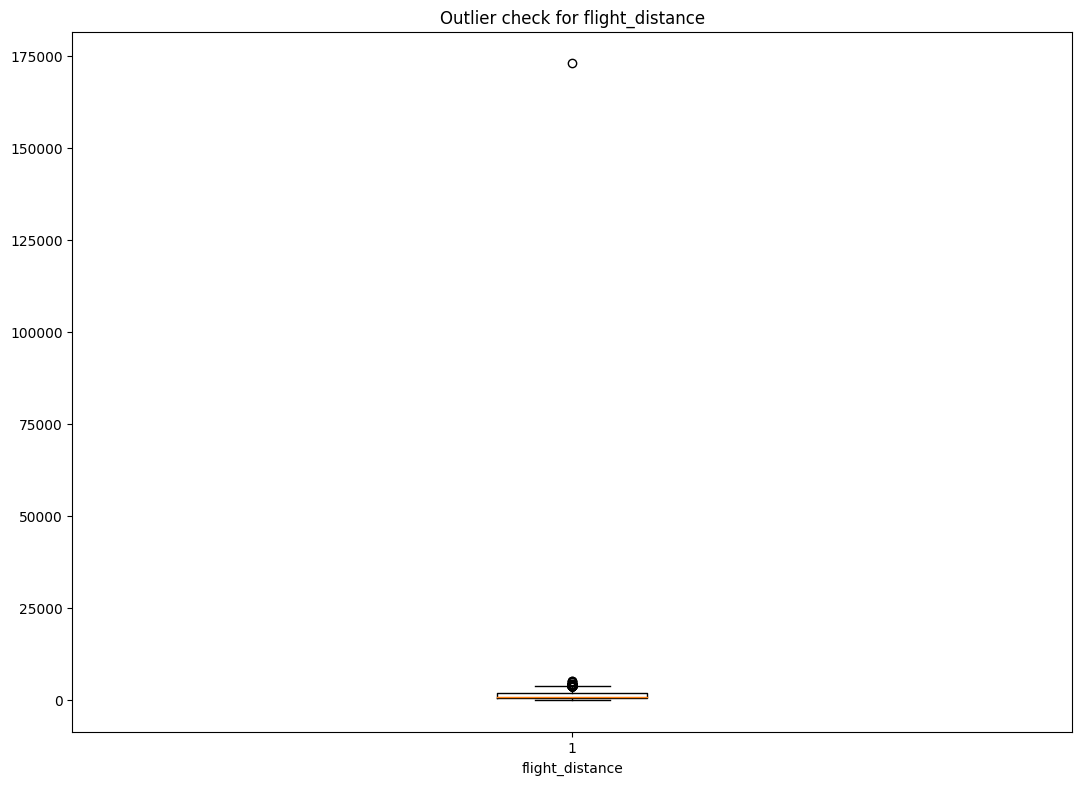

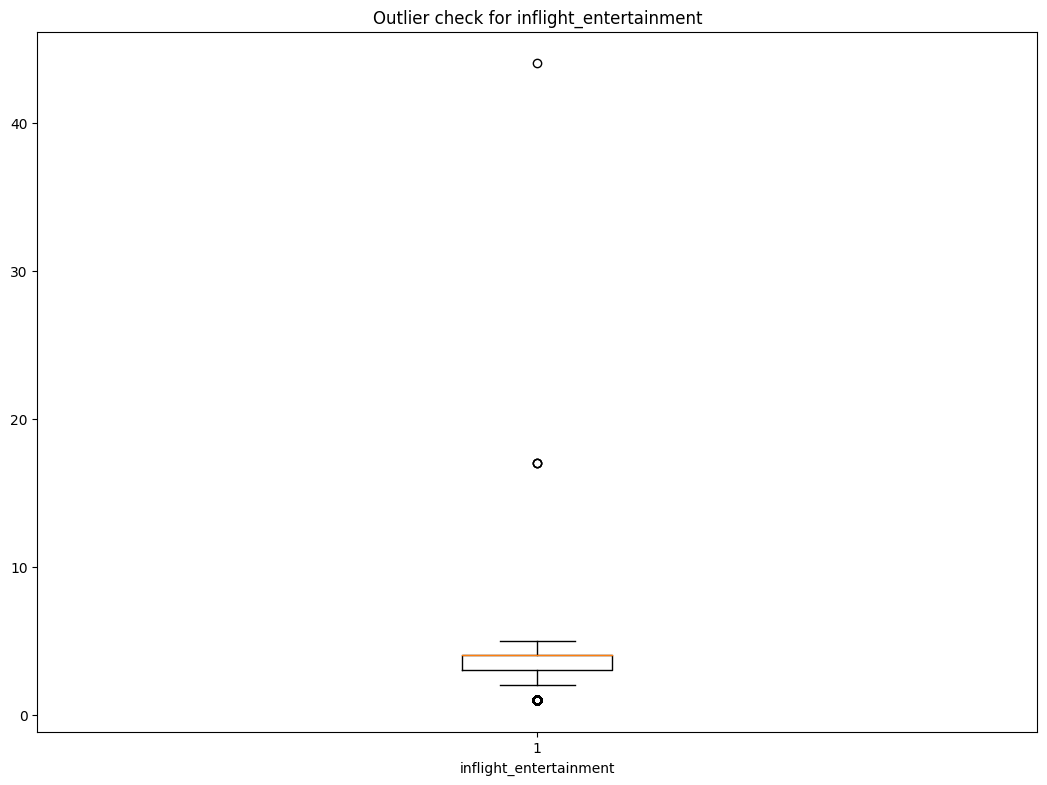

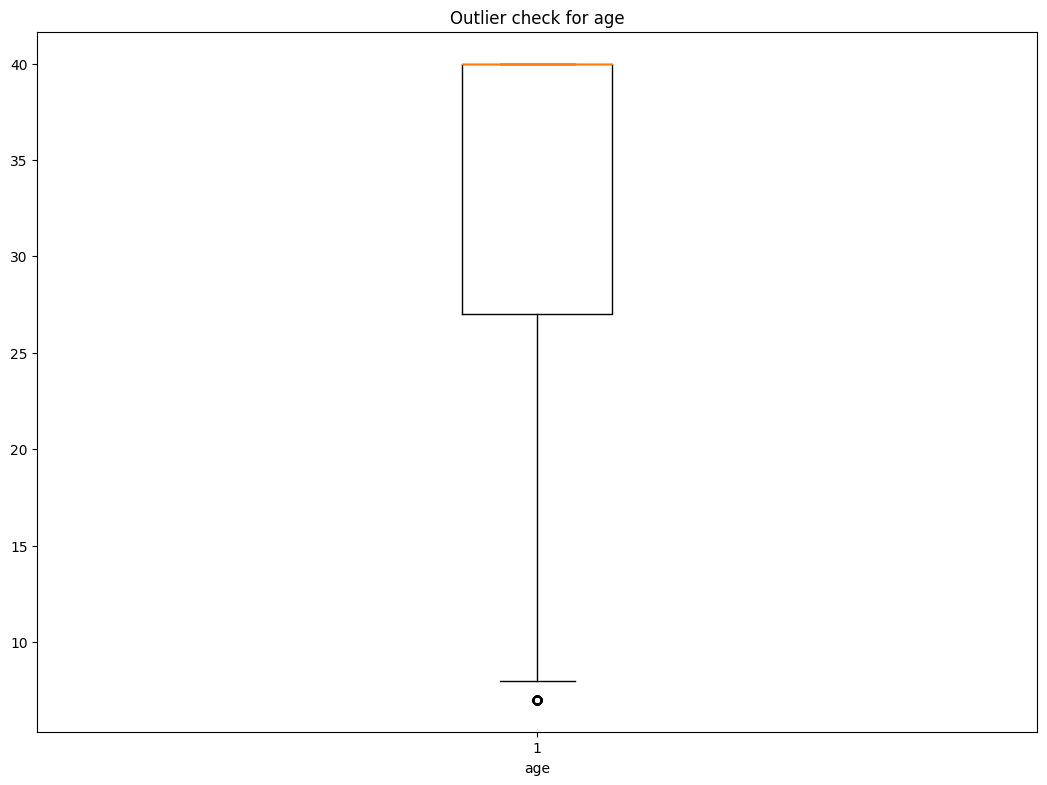

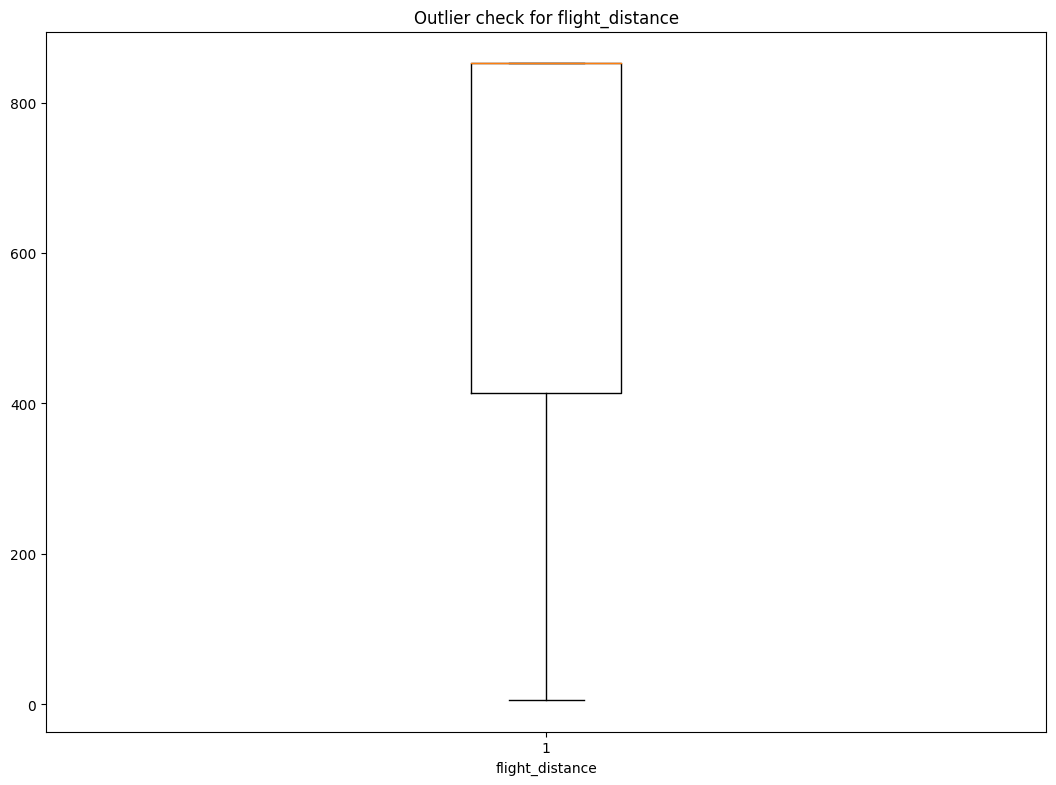

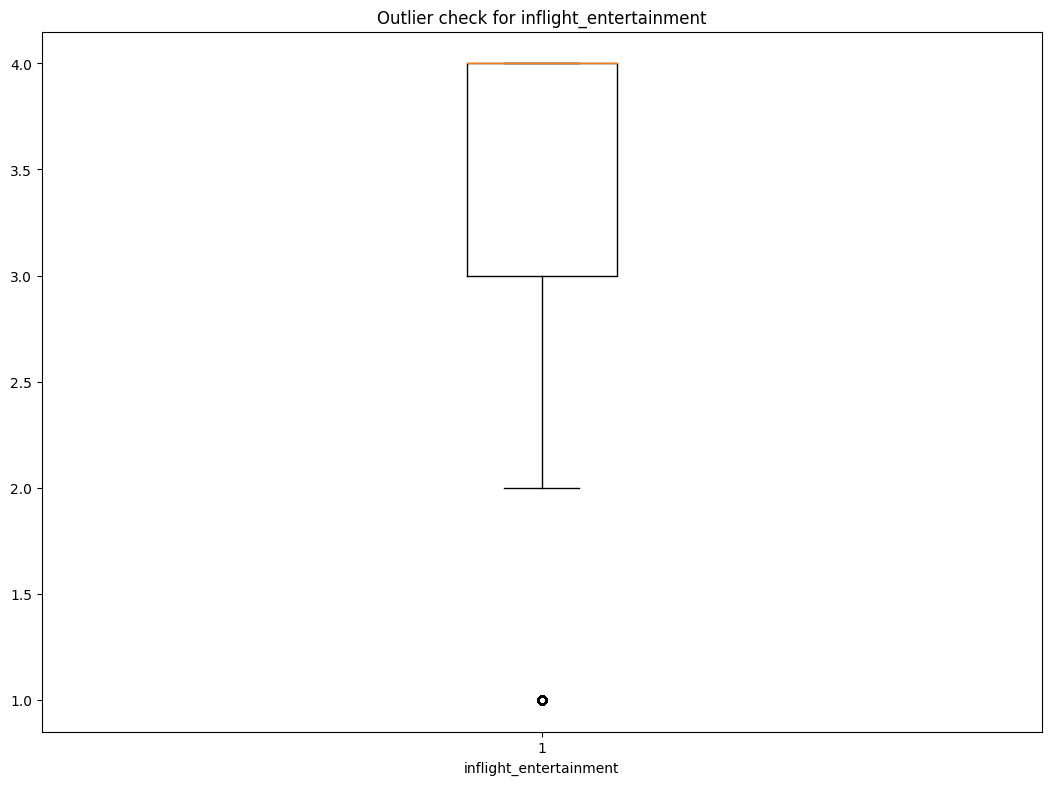

In [ ]:
#Asign new values to outliers

#After looking at the min/max values from df.describe we can see that there is anomalous results in age, flight_distance, inflight_entertainment
#There is also potential anomalies in departure_delay_in_minutes and arrival_delay_in_minutes however these are possible so I will ignore them
#Check this using box and whisker plots

data = {'age': df_not_class['age'],
        'flight_distance': df_not_class['flight_distance'],
        'inflight_entertainment': df_not_class['inflight_entertainment']}

names = list(data.keys())
values = list(data.values())

for i in range(3):
  fig = plt.figure(figsize =(10, 7))
  ax = fig.add_axes([0, 0, 1, 1])
  bp = ax.boxplot(values[i])
  plt.xlabel(names[i])
  plt.title("Outlier check for " + str(names[i]))
  plt.show()

#Replace all records with outliers with the median

median = int(df_not_class['age'].median())
df_not_class['age'] = np.where(df_not_class['age'] > median, median, df_not_class['age'])

median = int(df_not_class['flight_distance'].median())
df_not_class['flight_distance'] = np.where(df_not_class['flight_distance'] > median, median, df_not_class['flight_distance'])

median = int(df_not_class['inflight_entertainment'].median())
df_not_class['inflight_entertainment'] = np.where(df_not_class['inflight_entertainment'] > median, median, df_not_class['inflight_entertainment'])

df_not_class.head()

#Check this using box and whisker plots

data = {'age': df_not_class['age'],
        'flight_distance': df_not_class['flight_distance'],
        'inflight_entertainment': df_not_class['inflight_entertainment']}

names = list(data.keys())
values = list(data.values())


for i in range(3):
  fig = plt.figure(figsize =(10, 7))
  ax = fig.add_axes([0, 0, 1, 1])
  bp = ax.boxplot(values[i])
  plt.xlabel(names[i])
  plt.title("Outlier check for " + str(names[i]))
  plt.show()


In [ ]:
#Make all of the column names be separated by an '_' rather than a space

df_not_class.columns = [c.replace(' ', '_') for c in df_not_class.columns]

#Make all column names lower case

df_not_class.columns = [x.lower() for x in df_not_class.columns]

df_not_class.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,arrival_delay_in_minutes,female,male,loyal_customer,disloyal_customer,business_travel,personal_travel,business,eco,eco_plus
0,30.0,852.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,4.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,40.0,315.0,4.0,4.0,3.0,1.0,5.0,3.0,5.0,4.0,...,26.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,39.0,510.0,3.0,5.0,5.0,1.0,4.0,5.0,4.0,4.0,...,4.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,21.0,767.0,4.0,0.0,4.0,3.0,4.0,4.0,4.0,3.0,...,13.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,40.0,486.0,4.0,1.0,1.0,1.0,5.0,4.0,4.0,4.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Make df whole again
df_mlw = pd.concat([df_not_class, df_classes], axis=1) #mlw = machine learning workflow

df_mlw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                12988 non-null  float64
 1   flight_distance                    12988 non-null  float64
 2   inflight_wifi_service              12988 non-null  float64
 3   departure_arrival_time_convenient  12988 non-null  float64
 4   ease_of_online_booking             12988 non-null  float64
 5   gate_location                      12988 non-null  float64
 6   food_and_drink                     12988 non-null  float64
 7   online_boarding                    12988 non-null  float64
 8   seat_comfort                       12988 non-null  float64
 9   inflight_entertainment             12988 non-null  float64
 10  on_board_service                   12988 non-null  float64
 11  leg_room_service                   12988 non-null  flo

## Task 2.1 - ML Workflow to Critically Evaluate

In [ ]:
# Dropping all rows with missing values
df = df.dropna()

# Converting all non-numeric (object) features to numeric
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=None
                                                   )

<ipython-input-42-76234edbbfdc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
<ipython-input-42-76234edbbfdc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values


In [ ]:
# Creating and testing a Logistic Regression Model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out performance of the model
print("Accuracy: %s" % (metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 54.074074074074076


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Task 2.3 - Evaluation of Improved ML Workflow

Add code for running your **improved** machine learning experiments below.


In [ ]:
def Scaled_TTS():
  # Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
  X = df_mlw.iloc[:,:len(df_mlw.columns)-1]
  y = df_mlw.iloc[:,len(df_mlw.columns)-1]

  # Splitting dataset for hold-out validation
  X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                      y, # label vector
                                                      test_size=0.2,
                                                      random_state=1,
                                                      stratify=y
                                                     )

  ss = StandardScaler()
  X_train_scaled = ss.fit_transform(X_train)
  X_test_scaled = ss.transform(X_test)

  return X_train, X_test, y_train, y_test

In [ ]:
def RandomForest_Classifier(X_train, X_test, y_train, y_test):
  #Use GridSearch to determine optimal parameters for Random Forest Classifier

  grid_params = { 'n_estimators' : [100, 110, 120],
                 'criterion' : ['gini', 'entropy', 'log_loss'],
                 'max_depth' : [None, 2, 4, 6]}

  rs = RandomizedSearchCV(RandomForestClassifier(), grid_params, n_iter = 6, verbose = 0)

  rs_results = rs.fit(X_train, y_train)

  #Rerun Random Forest using best parameters

  rf = RandomForestClassifier(n_estimators = rs_results.best_params_['n_estimators'],
                              criterion = rs_results.best_params_['criterion'],
                              max_depth = rs_results.best_params_['max_depth'])
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=['disatisfied','satisfied', 'neutral'])
  cmd.plot()

  return "Random Forest", metrics.accuracy_score(y_test, y_pred), rs_results.best_params_

In [ ]:
def KNN_Classifier(X_train, X_test, y_train, y_test):
  #Use GridSearch to determine optimal parameters for KKN Classifier

  grid_params = { 'n_neighbors' : [5,7,9,11,13,15]}

  rs = RandomizedSearchCV(KNeighborsClassifier(), grid_params, n_iter = 4, verbose = 0)

  rs_results = rs.fit(X_train, y_train)

  #Rerun KNN using best parameters
  knn = KNeighborsClassifier(n_neighbors = rs_results.best_params_['n_neighbors'])

  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=['disatisfied','satisfied', 'neutral'])
  cmd.plot()

  return "KNN", metrics.accuracy_score(y_test, y_pred), rs_results.best_params_

In [ ]:
def NaiveBayes(X_train, X_test, y_train, y_test):
  #Use GridSearch to determine optimal parameters for Naive Bayes Classifier

  grid_params = { 'var_smoothing' : [1e-7, 1e-8, 1e-9, 1e-10]}

  rs = RandomizedSearchCV(GaussianNB(), grid_params, verbose = 0)

  rs_results = rs.fit(X_train, y_train)

  #Rerun Naive Bayes using best parameters
  nb = GaussianNB(var_smoothing = rs_results.best_params_['var_smoothing'])
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=['disatisfied','satisfied', 'neutral'])
  cmd.plot()

  return "Naive Bayes", metrics.accuracy_score(y_test, y_pred), rs_results.best_params_

In [ ]:
def Scaled_NeuralNetwork():
  #The neural network requires that the class labels are One Hot Encoded so a different setup is required
  # Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)

  X = df_mlw.iloc[:,:len(df_mlw.columns)-1]
  y = df_mlw.iloc[:,len(df_mlw.columns)-1]

  #One Hot Encode the class column using keras's built in One Hot Encoding function for simplicity

  y_temp = pd.get_dummies(y)
  y = pd.concat([y, y_temp], axis=1).reindex(y.index)
  y.drop('class', axis=1, inplace=True)

  # Splitting dataset for hold-out validation

  X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                      y, # label vector
                                                      test_size=0.2,
                                                      random_state=1,
                                                      stratify=y
                                                     )
  ss = StandardScaler()
  X_train_scaled = ss.fit_transform(X_train)
  X_test_scaled = ss.transform(X_test)

  #Run the model

  hp = kt.HyperParameters()

  nn = Sequential()
  nn.add(Dense(25, activation='relu'))
  nn.add(Dense(units=hp.Int("units", min_value=1, max_value=16, step=1), activation='relu'))
  nn.add(Dense(3, activation='softmax'))
  nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  nn.fit(X_train_scaled, y_train, epochs=5, verbose = 0)
  accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 0)

  return "Scaled Neural Network", accuracy[1]

In [ ]:
#4 Models given scaled train test split

name, accuracy, bestparams = RandomForest_Classifier(*Scaled_TTS())
print("\nAccuracy (Testing) for Scaled %s using parameters %s:  %0.2f " % (name, bestparams, accuracy))

name, accuracy, bestparams = KNN_Classifier(*Scaled_TTS())
print("\nAccuracy (Testing) for Scaled %s using parameters %s:  %0.2f " % (name, bestparams, accuracy))

name, accuracy, bestparams = NaiveBayes(*Scaled_TTS())
print("\nAccuracy (Testing) for Scaled %s using parameters %s:  %0.2f " % (name, bestparams, accuracy))

name, accuracy = Scaled_NeuralNetwork()
print("\nAccuracy (Testing) for %s:  %0.2f " % (name, accuracy))

# Appendices - Code for testing machine learning model combinations

In [ ]:
def Standard_TTS():
  # Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
  X = df_mlw.iloc[:,:len(df_mlw.columns)-1]
  y = df_mlw.iloc[:,len(df_mlw.columns)-1]

  # Splitting dataset for hold-out validation
  X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                      y, # label vector
                                                      test_size=0.2,
                                                      random_state=1,
                                                      stratify=y
                                                     )
  return X_train, X_test, y_train, y_test

In [ ]:
def RandomForest_Classifier(X_train, X_test, y_train, y_test):
  #Use GridSearch to determine optimal parameters for Random Forest Classifier

  grid_params = { 'n_estimators' : [100, 110, 120],
                 'criterion' : ['gini', 'entropy', 'log_loss'],
                 'max_depth' : [None, 2, 4, 6]}

  rs = RandomizedSearchCV(RandomForestClassifier(), grid_params, n_iter = 6, verbose = 0)

  rs_results = rs.fit(X_train, y_train)

  #Rerun Random Forest using best parameters

  rf = RandomForestClassifier(n_estimators = rs_results.best_params_['n_estimators'],
                              criterion = rs_results.best_params_['criterion'],
                              max_depth = rs_results.best_params_['max_depth'])
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=['disatisfied','satisfied', 'neutral'])
  cmd.plot()

  return "Random Forest", metrics.accuracy_score(y_test, y_pred), rs_results.best_params_

In [ ]:
def KNN_Classifier(X_train, X_test, y_train, y_test):
  #Use GridSearch to determine optimal parameters for KKN Classifier

  grid_params = { 'n_neighbors' : [5,7,9,11,13,15]}

  rs = RandomizedSearchCV(KNeighborsClassifier(), grid_params, n_iter = 4, verbose = 0)

  rs_results = rs.fit(X_train, y_train)

  #Rerun KNN using best parameters
  knn = KNeighborsClassifier(n_neighbors = rs_results.best_params_['n_neighbors'])

  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=['disatisfied','satisfied', 'neutral'])
  cmd.plot()

  return "KNN", metrics.accuracy_score(y_test, y_pred), rs_results.best_params_

In [ ]:
def NaiveBayes(X_train, X_test, y_train, y_test):
  #Use GridSearch to determine optimal parameters for Naive Bayes Classifier

  grid_params = { 'var_smoothing' : [1e-7, 1e-8, 1e-9, 1e-10]}

  rs = RandomizedSearchCV(GaussianNB(), grid_params, verbose = 0)

  rs_results = rs.fit(X_train, y_train)

  #Rerun Naive Bayes using best parameters
  nb = GaussianNB(var_smoothing = rs_results.best_params_['var_smoothing'])
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=['disatisfied','satisfied', 'neutral'])
  cmd.plot()

  return "Naive Bayes", metrics.accuracy_score(y_test, y_pred), rs_results.best_params_

In [ ]:
def NeuralNetwork():
  #The neural network requires that the class labels are One Hot Encoded so a different setup is required
  # Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
  X = df_mlw.iloc[:,:len(df_mlw.columns)-1]
  y = df_mlw.iloc[:,len(df_mlw.columns)-1]

  #One Hot Encode the class column

  y_temp = pd.get_dummies(y)
  y = pd.concat([y, y_temp], axis=1).reindex(y.index)
  y.drop('class', axis=1, inplace=True)

  # Splitting dataset for hold-out validation
  X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                      y, # label vector
                                                      test_size=0.2,
                                                      random_state=1,
                                                      stratify=y
                                                     )
  #Run the model

  hp = kt.HyperParameters()

  nn = Sequential()
  nn.add(Dense(25, activation='relu'))
  nn.add(Dense(units=hp.Int("units", min_value=1, max_value=16, step=1), activation='relu'))
  nn.add(Dense(3, activation='softmax'))
  nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  nn.fit(X_train, y_train, epochs=5, verbose = 0)
  accuracy = nn.evaluate(X_test, y_test, verbose = 0)

  return "Neural Network", accuracy[1]

In [ ]:
def Scaled_TTS():
  # Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
  X = df_mlw.iloc[:,:len(df_mlw.columns)-1]
  y = df_mlw.iloc[:,len(df_mlw.columns)-1]

  # Splitting dataset for hold-out validation
  X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                      y, # label vector
                                                      test_size=0.2,
                                                      random_state=1,
                                                      stratify=y
                                                     )

  ss = StandardScaler()
  X_train_scaled = ss.fit_transform(X_train)
  X_test_scaled = ss.transform(X_test)

  return X_train, X_test, y_train, y_test

In [ ]:
def Scaled_NeuralNetwork():
  #The neural network requires that the class labels are One Hot Encoded so a different setup is required
  # Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)

  X = df_mlw.iloc[:,:len(df_mlw.columns)-1]
  y = df_mlw.iloc[:,len(df_mlw.columns)-1]

  #One Hot Encode the class column using keras's built in One Hot Encoding function for simplicity

  y_temp = pd.get_dummies(y)
  y = pd.concat([y, y_temp], axis=1).reindex(y.index)
  y.drop('class', axis=1, inplace=True)

  # Splitting dataset for hold-out validation

  X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                      y, # label vector
                                                      test_size=0.2,
                                                      random_state=1,
                                                      stratify=y
                                                     )
  ss = StandardScaler()
  X_train_scaled = ss.fit_transform(X_train)
  X_test_scaled = ss.transform(X_test)

  #Run the model

  hp = kt.HyperParameters()

  nn = Sequential()
  nn.add(Dense(25, activation='relu'))
  nn.add(Dense(units=hp.Int("units", min_value=1, max_value=16, step=1), activation='relu'))
  nn.add(Dense(3, activation='softmax'))
  nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  nn.fit(X_train_scaled, y_train, epochs=5, verbose = 0)
  accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 0)

  return "Scaled Neural Network", accuracy[1]


Accuracy (Testing) for Random Forest using parameters {'n_estimators': 120, 'max_depth': None, 'criterion': 'log_loss'}:  0.86 

Accuracy (Testing) for KNN using parameters {'n_neighbors': 7}:  0.69 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Accuracy (Testing) for Scaled Naive Bayes using parameters {'var_smoothing': 1e-07}:  0.77 

Accuracy (Testing) for Neural Network:  0.51 

---------------------------------------------------------------------------------------


Accuracy (Testing) for Scaled Random Forest using parameters {'n_estimators': 110, 'max_depth': None, 'criterion': 'gini'}:  0.86 

Accuracy (Testing) for Scaled KNN using parameters {'n_neighbors': 7}:  0.69 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Accuracy (Testing) for Scaled Naive Bayes using parameters {'var_smoothing': 1e-07}:  0.77 

Accuracy (Testing) for Scaled Neural Network:  0.84 


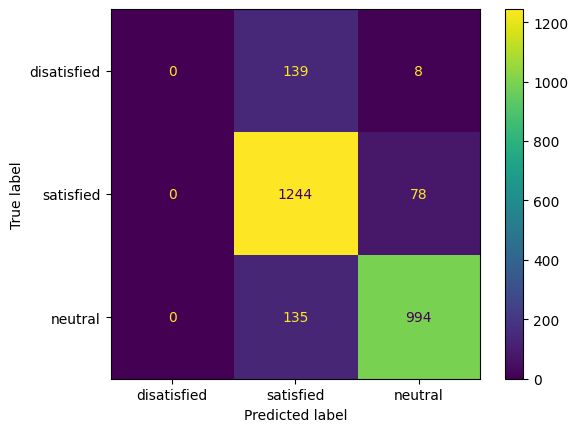

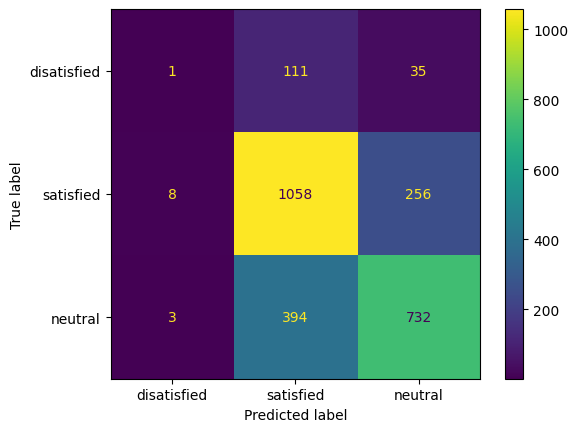

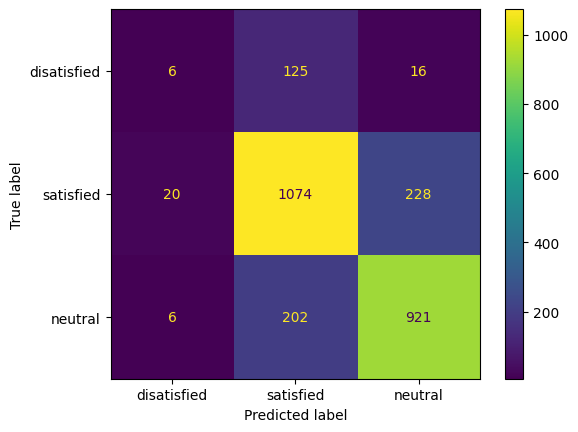

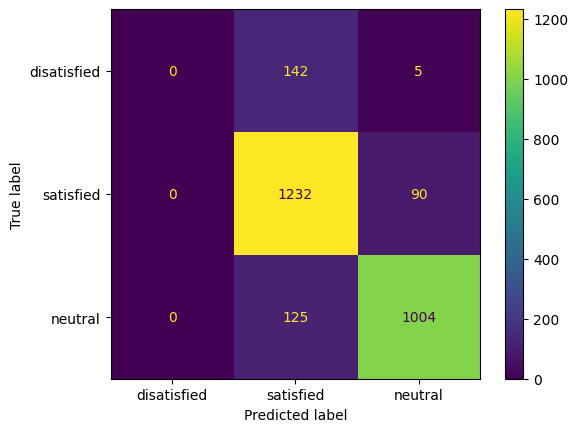

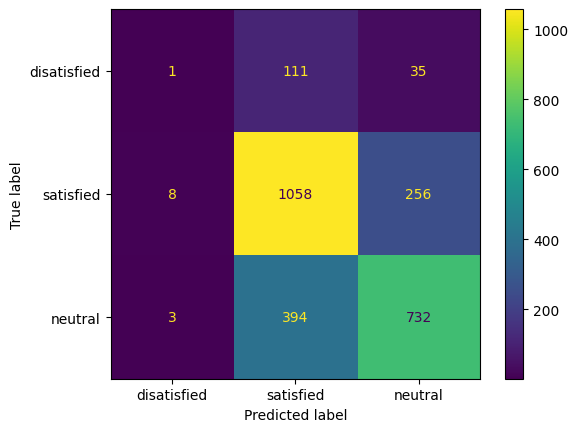

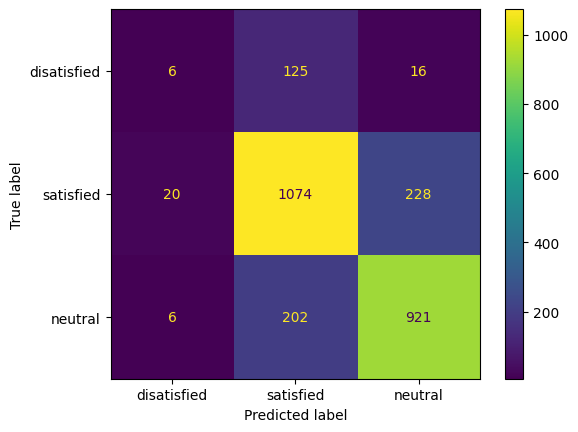

In [ ]:
#4 Models given standard train test split

name, accuracy, bestparams = RandomForest_Classifier(*Standard_TTS())
print("\nAccuracy (Testing) for %s using parameters %s:  %0.2f " % (name, bestparams, accuracy))

name, accuracy, bestparams = KNN_Classifier(*Standard_TTS())
print("\nAccuracy (Testing) for %s using parameters %s:  %0.2f " % (name, bestparams, accuracy))

name, accuracy, bestparams = NaiveBayes(*Standard_TTS())
print("\nAccuracy (Testing) for Scaled %s using parameters %s:  %0.2f " % (name, bestparams, accuracy))

name, accuracy = NeuralNetwork()
print("\nAccuracy (Testing) for %s:  %0.2f " % (name, accuracy))

print("\n---------------------------------------------------------------------------------------\n")

#4 Models given scaled train test split

name, accuracy, bestparams = RandomForest_Classifier(*Scaled_TTS())
print("\nAccuracy (Testing) for Scaled %s using parameters %s:  %0.2f " % (name, bestparams, accuracy))

name, accuracy, bestparams = KNN_Classifier(*Scaled_TTS())
print("\nAccuracy (Testing) for Scaled %s using parameters %s:  %0.2f " % (name, bestparams, accuracy))

name, accuracy, bestparams = NaiveBayes(*Scaled_TTS())
print("\nAccuracy (Testing) for Scaled %s using parameters %s:  %0.2f " % (name, bestparams, accuracy))

name, accuracy = Scaled_NeuralNetwork()
print("\nAccuracy (Testing) for %s:  %0.2f " % (name, accuracy))